#Detecting whether the person is wearing masks or not.

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2
import gdown
import glob
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout,BatchNormalization, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
import warnings

#Data Mining

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!7z x '/content/drive/MyDrive/data/Real-World-Masked-Face-Dataset-master.zip'


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/data/                                      1 file, 187072300 bytes (179 MiB)

Extracting archive: /content/drive/MyDrive/data/Real-World-Masked-Face-Dataset-master.zip
--
Path = /content/drive/MyDrive/data/Real-World-Masked-Face-Dataset-master.zip
Type = zip
Physical Size = 187072300
Comment = 241679901f6b95394b264cfbfd9f434c4139ec25

  0%     11% 2 - Real-World-Masked-Face-Dataset-master/RMFD_part_2.part1.rar                                                                     29% 4 - Real-World-Masked-Face-Dat

In [4]:
!7z x '/content/drive/MyDrive/data/self-built-masked-face-recognition-dataset.zip'


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/data/                                      1 file, 636274634 bytes (607 MiB)

Extracting archive: /content/drive/MyDrive/data/self-built-masked-face-recognition-dataset.zip
  6% 4096 Open               50% 32768 Open               --
Path = /content/drive/MyDrive/data/self-built-masked-face-recognition-dataset.zip
Type = zip
Physical Size = 636274634
64-bit = +

  0%      1% 1069 - self-built-masked-face-recogn . aset/baike/1_0_baike_0107.jpg                                                                         

In [5]:
!unrar x '/content/Real-World-Masked-Face-Dataset-master/RMFD_part_2.part1.rar' '/content/Real-World-Masked-Face-Dataset-master/'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Real-World-Masked-Face-Dataset-master/RMFD_part_2.part1.rar

Creating    /content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro  OK
Creating    /content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/00000  OK
Extracting  /content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/00000/000.jpg       0%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/00000/001.jpg       0%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/00000/002.jpg       0%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/00000/003.jpg       0%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/00000/004.jpg       0%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/00000/005.jpg       0%  OK 
E

In [6]:
!unrar x '/content/Real-World-Masked-Face-Dataset-master/RMFD_part_3.part1.rar' '/content/Real-World-Masked-Face-Dataset-master'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Real-World-Masked-Face-Dataset-master/RMFD_part_3.part1.rar

Creating    /content/Real-World-Masked-Face-Dataset-master/single2-0  OK
Extracting  /content/Real-World-Masked-Face-Dataset-master/single2-0/1.jpg       0%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/single2-0/10.jpg       0%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/single2-0/100.jpg       1%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/single2-0/101.jpg       8%  9%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/single2-0/102.jpg      16% 17%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/single2-0/103.jpg      17%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/single2-0/104.jpg      18%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/

In [7]:
img = cv2.imread('/content/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset/anhu/0_0_5.jpg')

In [8]:
im = cv2.imread('/content/Real-World-Masked-Face-Dataset-master/single2-0/1.jpg')

In [10]:
f_paths = ['/content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/*/*.jpg','/content/Real-World-Masked-Face-Dataset-master/single2-0/*.jpg',
         '/content/Real-World-Masked-Face-Dataset-master/RWMFD_part_1/*/*.jpg','/content/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset/*/*.jpg',
         '/content/self-built-masked-face-recognition-dataset/AFDB_face_dataset/*/*.jpg']

In [9]:
print(len(glob.glob('/content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/*/*.jpg')))
print(len(glob.glob('/content/Real-World-Masked-Face-Dataset-master/single2-0/*.jpg')))
print(len(glob.glob('/content/Real-World-Masked-Face-Dataset-master/RWMFD_part_1/*/*.jpg')))
print(len(glob.glob('/content/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset/*/*.jpg')))
print(len(glob.glob('/content/self-built-masked-face-recognition-dataset/AFDB_face_dataset/*/*.jpg')))

2813
298
1193
2118
90468


In [11]:
mask = []
unmask = []
for j in range(4):
  for i in glob.glob(f_paths[j]):
    mask.append(i)

mask = sorted(mask)

for j in glob.glob(f_paths[-1]):
  unmask.append(j)

unmask = sorted(unmask)

In [12]:
print(unmask[0])

/content/self-built-masked-face-recognition-dataset/AFDB_face_dataset/aidai/0_0_aidai_0014.jpg


In [13]:
print(cv2.imread(mask[0]))

[[[  4   5   3]
  [  9  10   8]
  [  3   3   3]
  ...
  [100 112 100]
  [ 89 103  91]
  [ 90 105  91]]

 [[  1   2   0]
  [  7   8   6]
  [  0   0   0]
  ...
  [ 92 103  93]
  [ 93 105  93]
  [ 91 105  93]]

 [[  5   5   5]
  [  5   5   5]
  [  2   2   2]
  ...
  [ 94 105  97]
  [ 93 104  94]
  [ 92 103  93]]

 ...

 [[ 29  26  21]
  [ 23  20  15]
  [ 34  31  26]
  ...
  [149 156 153]
  [141 148 145]
  [140 147 144]]

 [[ 27  24  19]
  [ 36  33  28]
  [ 29  26  21]
  ...
  [137 144 141]
  [143 150 147]
  [140 147 144]]

 [[ 15  12   7]
  [ 14  11   6]
  [ 19  16  11]
  ...
  [135 142 139]
  [145 152 149]
  [142 149 146]]]


#Data Visualization

In [14]:
r = 3
c = 5

With Mask

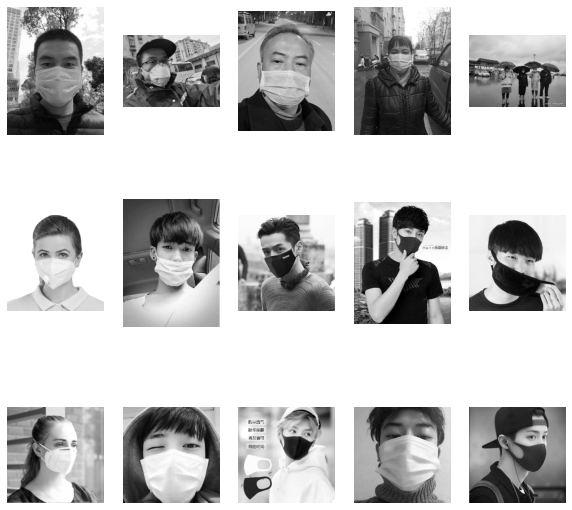

In [15]:
f = plt.figure(figsize=(10,10))
for i in range(1, c*r +1):
    img = cv2.imread(mask[i])
    img = np.array(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
    f.add_subplot(r, c, i)
    plt.axis('off')
    plt.imshow(img, cmap = 'gray')
plt.show()

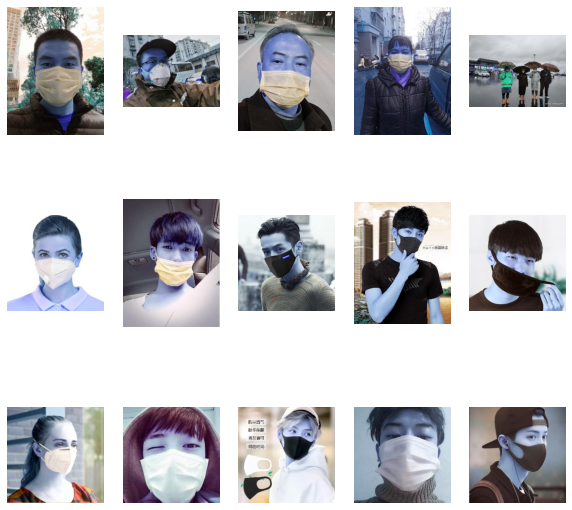

In [16]:
f = plt.figure(figsize=(10,10))
for i in range(1, c*r +1):
    img = cv2.imread(mask[i])
    f.add_subplot(r, c, i)
    plt.axis('off')
    plt.imshow(img)
plt.show()

Without Mask

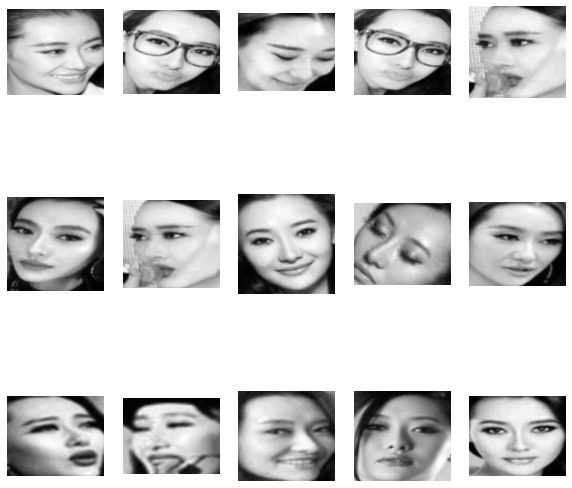

In [17]:
f = plt.figure(figsize=(10,10))
for i in range(1, c*r +1):
    img = cv2.imread(unmask[i])
    img = np.array(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
    f.add_subplot(r, c, i)
    plt.axis('off')
    plt.imshow(img, cmap = 'gray')
plt.show()

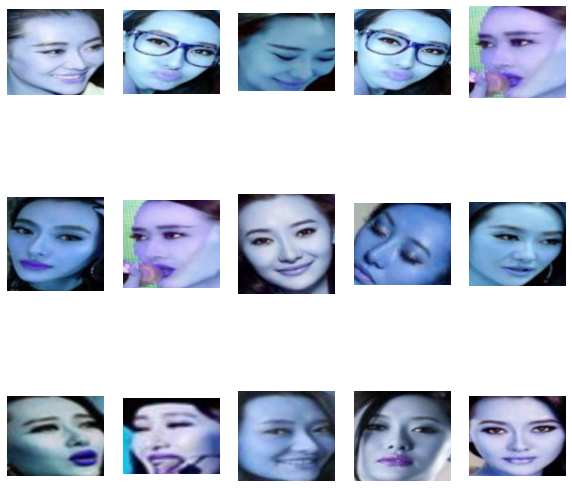

In [18]:
f = plt.figure(figsize=(10,10))
for i in range(1, c*r +1):
    img = cv2.imread(unmask[i])
    f.add_subplot(r, c, i)
    plt.axis('off')
    plt.imshow(img)
plt.show()

#Data Preprocessing

In [19]:
unmask_values = unmask[3000:3500]
mask_values = mask[1200:1700]

In [20]:
mask = mask[:1000]
unmask = unmask[:1000]

In [21]:
len(unmask)+len(mask)

2000

In [22]:
l = []
for i in range(len(unmask)+len(mask)):
  if i <len(mask):
    l.append(1)
  else:
    l.append(0)

In [23]:
value_labels = []
for i in range(500):
  value_labels.append(1)
for i in range(500):
  value_labels.append(0)

In [24]:
data = pd.DataFrame({'image':np.concatenate([(mask),(unmask)]),'label':l})
data_values = pd.DataFrame({'image':np.concatenate([(mask_values),(unmask_values)]),'label':value_labels})

In [25]:
data.head()

,image,label
0,/content/Real-World-Masked-Face-Dataset-master...,1
1,/content/Real-World-Masked-Face-Dataset-master...,1
2,/content/Real-World-Masked-Face-Dataset-master...,1
3,/content/Real-World-Masked-Face-Dataset-master...,1
4,/content/Real-World-Masked-Face-Dataset-master...,1


In [26]:
x = data.drop('label', axis=1)
y = data[['label']]

In [27]:
ind = data[(data.image == '/content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/00415/011.jpg' )].index
data = data.drop(ind)

In [28]:
st_dev = 0
mean = 0
W=0
H=0
for i in data.values:
  p = i[0]
  image = cv2.imread(p)
  try:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h,w,f = image.shape
    W = W + w
    H = H + h
    image = image.reshape(-1,3)
    st_dev = np.std(image, axis = 0)/255 + st_dev
    mean = np.mean(image, axis =0)/255 + mean
  except:
    print(p)

st_dev = st_dev/len(data.values)
mean = mean/len(data.values)
W = W/len(data.values)
H = H/len(data.values)

print(f"Mean: {mean}" )
print(f"Standard Deviation: {st_dev}")
print(H, W)

Mean:  [0.56157353 0.48844826 0.45872852]
Standard Deviation:  [0.26021037 0.24493383 0.23474921]
171.9955 193.362


In [29]:
st_dev = 0
mean = 0
W=0
H=0
for i in data_values.values:
  p = i[0]
  image = cv2.imread(p)
  try:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h,w,f = image.shape
    W = W + w
    H = H + h
    image = image.reshape(-1,3)
    st_dev = np.std(image, axis = 0)/255 + st_dev
    mean = np.mean(image, axis =0)/255 + mean
  except:
    print(p)

st_dev = st_dev/len(data.values)
mean = mean/len(data.values)
W = W/len(data.values)
H = H/len(data.values)

print(f"Mean: {mean}" )
print(f"Standard Deviation: {st_dev}")
print(H, W)

Mean:  [0.2964207  0.26059609 0.24993298]
Standard Deviation:  [0.12871605 0.12292825 0.11740905]
97.095 100.342


#Data Validation, Standardization and LDA implementation

In [32]:
L = []
for i in data_values.values:
  j = cv2.imread(i[0])
  j.resize(175,175,3)
  L.append(j)

L = np.array(L)
L_ = np.reshape(L, (L.shape[0], -1))
L_.shape
P_ = data_values[['label']]

In [33]:
P_.shape

(1000, 1)

In [34]:
L_ = L_/255
L_.shape

(1000, 91875)

In [35]:
ss = StandardScaler()
L_ = ss.fit_transform(L_)
d_values = pd.DataFrame(L_, columns = [i for i in range(91875)])
d_values.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,91835,91836,91837,91838,91839,91840,91841,91842,91843,91844,91845,91846,91847,91848,91849,91850,91851,91852,91853,91854,91855,91856,91857,91858,91859,91860,91861,91862,91863,91864,91865,91866,91867,91868,91869,91870,91871,91872,91873,91874
0,1.564006,1.624905,1.619572,1.581191,1.640748,1.637188,1.578728,1.644152,1.649344,1.591168,1.652685,1.658920,1.582236,1.658293,1.660480,1.586756,1.659666,1.665026,1.603232,1.678499,1.668907,1.612033,1.683962,1.677684,1.621064,1.693983,1.684379,1.639967,1.709944,1.699960,1.665809,1.736977,1.713394,1.684050,1.754701,1.734876,1.681652,1.759028,1.749934,1.693770,...,-0.226962,-0.011390,-0.141672,-0.166886,-0.024359,-0.180636,-0.191930,0.097336,-0.082119,-0.097088,0.178506,-0.002881,-0.019688,0.179182,0.023220,0.003940,0.205480,0.073829,0.042951,0.104119,-0.039463,-0.043139,0.076731,-0.043093,-0.044982,0.054957,-0.025948,-0.041384,0.041561,-0.014870,-0.030484,0.006225,-0.049282,-0.066788,0.092564,0.037382,0.016878,0.049171,-0.007713,-0.026346
1,1.457329,1.458274,1.475082,1.498118,1.509756,1.504623,1.566869,1.572697,1.516767,1.437147,1.438712,1.370373,1.287056,1.255806,1.181486,0.986541,0.940057,0.888924,1.003783,0.948435,0.941849,1.094809,1.024670,1.045959,1.385179,1.316244,1.338153,1.651829,1.591228,1.592133,1.653907,1.617949,1.569269,1.648167,1.622997,1.553582,1.609677,1.578635,1.506893,1.681743,...,1.758165,1.731899,1.824676,1.771229,1.675929,1.763097,1.712481,1.626735,1.690571,1.652557,1.624141,1.684941,1.647237,1.660720,1.725744,1.682408,1.637310,1.700826,1.664399,1.668371,1.759844,1.707337,1.653469,1.746864,1.701452,1.620729,1.716849,1.668805,1.691639,1.786845,1.736011,1.750723,1.850372,1.791676,1.677109,1.774084,1.713997,1.607836,1.702265,1.639473
2,1.386212,0.791749,0.283033,1.343841,0.747620,0.239231,1.400834,0.810518,0.299468,1.377908,0.784903,0.276296,1.440549,0.853319,0.355222,1.410222,0.822089,0.327742,1.450431,0.889559,0.393576,1.423951,0.859847,0.366556,1.479533,0.914896,0.418862,1.485759,0.914549,0.418020,1.522981,0.975197,0.476321,1.504636,0.952506,0.453731,1.549698,1.013407,0.486119,1.537420,...,1.965911,2.261954,2.289449,2.059639,2.266307,2.299710,2.104905,2.278804,2.313408,2.162388,2.305142,2.335958,2.195108,2.305905,2.341550,2.195274,2.305498,2.339573,2.200993,2.330170,2.367718,2.224256,2.315458,2.367870,2.220662,2.278114,2.334089,2.184204,2.285192,2.327359,2.189257,2.312308,2.358559,2.212460,2.289320,2.369178,2.205577,2.314106,2.403480,2.277446
3,-0.439139,-0.148528,-0.030030,-0.424418,-0.133600,-0.013847,-0.401828,-0.106479,0.010208,-0.375563,-0.082879,0.035840,-0.342338,-0.046357,0.067826,-0.296271,-0.003692,0.112821,-0.265638,0.029968,0.143278,-0.221760,0.071051,0.187766,-0.148077,0.147613,0.263657,-0.056322,0.237870,0.358116,0.059000,0.356251,0.476321,0.129130,0.425691,0.550421,0.170184,0.472230,0.595488,0.214463,...,0.176988,0.035726,0.025169,0.063842,0.034679,0.034009,0.050450,0.500434,0.504785,0.505439,0.704191,0.708415,0.703035,0.418140,0.445832,0.446869,-0.283729,-0.263622,-0.237011,-0.521582,-0.501447,-0.466073,-0.151957,-0.128329,-0.103984,0.509151,0.542881,0.544297,0.552016,0.585701,0.585465,0.197403,0.204812,0.213735,0.416675,0.450304,0.449936,1.072045,1.099467,1.096014
4,1.646976,1.660612,1.619572,1.664263,1.688382,1.637188,1.673605,1.703697,1.613187,1.685950,1.712122,1.610829,1.688501,1.717482,1.624555,1.692676,1.718651,1.629206,1.697263,1.725600,1.668907,1.682563,1.731054,1.677684,1.668242,1.729396,1.684379,1.663691,1.745558,1.699960,1.725320,1.772685,1.713394,1.731893,1.790620,1.710704,1.765622,1.807132,1.664869,1.645662,...,0.996430,2.038153,1.777007,1.113655,2.006541,1.775021,1.135387,2.065400,1.906168,1.281771,2.078142,1.914003,1.320846,2.162531,1.979311,1.402664,2.126519,1.941862,1.372772,2.209843,2.015151,1.413633,2.146952,1.953866,1.359245,2.110779,1.946801,1.352537,2.059642,1.882936,1.317631,2.049439,1.838272,1.300761,1.881179,1.676926,1

In [36]:
d_values['label'] = P_.values.ravel()
d_values.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,91836,91837,91838,91839,91840,91841,91842,91843,91844,91845,91846,91847,91848,91849,91850,91851,91852,91853,91854,91855,91856,91857,91858,91859,91860,91861,91862,91863,91864,91865,91866,91867,91868,91869,91870,91871,91872,91873,91874,label
0,1.564006,1.624905,1.619572,1.581191,1.640748,1.637188,1.578728,1.644152,1.649344,1.591168,1.652685,1.658920,1.582236,1.658293,1.660480,1.586756,1.659666,1.665026,1.603232,1.678499,1.668907,1.612033,1.683962,1.677684,1.621064,1.693983,1.684379,1.639967,1.709944,1.699960,1.665809,1.736977,1.713394,1.684050,1.754701,1.734876,1.681652,1.759028,1.749934,1.693770,...,-0.011390,-0.141672,-0.166886,-0.024359,-0.180636,-0.191930,0.097336,-0.082119,-0.097088,0.178506,-0.002881,-0.019688,0.179182,0.023220,0.003940,0.205480,0.073829,0.042951,0.104119,-0.039463,-0.043139,0.076731,-0.043093,-0.044982,0.054957,-0.025948,-0.041384,0.041561,-0.014870,-0.030484,0.006225,-0.049282,-0.066788,0.092564,0.037382,0.016878,0.049171,-0.007713,-0.026346,1
1,1.457329,1.458274,1.475082,1.498118,1.509756,1.504623,1.566869,1.572697,1.516767,1.437147,1.438712,1.370373,1.287056,1.255806,1.181486,0.986541,0.940057,0.888924,1.003783,0.948435,0.941849,1.094809,1.024670,1.045959,1.385179,1.316244,1.338153,1.651829,1.591228,1.592133,1.653907,1.617949,1.569269,1.648167,1.622997,1.553582,1.609677,1.578635,1.506893,1.681743,...,1.731899,1.824676,1.771229,1.675929,1.763097,1.712481,1.626735,1.690571,1.652557,1.624141,1.684941,1.647237,1.660720,1.725744,1.682408,1.637310,1.700826,1.664399,1.668371,1.759844,1.707337,1.653469,1.746864,1.701452,1.620729,1.716849,1.668805,1.691639,1.786845,1.736011,1.750723,1.850372,1.791676,1.677109,1.774084,1.713997,1.607836,1.702265,1.639473,1
2,1.386212,0.791749,0.283033,1.343841,0.747620,0.239231,1.400834,0.810518,0.299468,1.377908,0.784903,0.276296,1.440549,0.853319,0.355222,1.410222,0.822089,0.327742,1.450431,0.889559,0.393576,1.423951,0.859847,0.366556,1.479533,0.914896,0.418862,1.485759,0.914549,0.418020,1.522981,0.975197,0.476321,1.504636,0.952506,0.453731,1.549698,1.013407,0.486119,1.537420,...,2.261954,2.289449,2.059639,2.266307,2.299710,2.104905,2.278804,2.313408,2.162388,2.305142,2.335958,2.195108,2.305905,2.341550,2.195274,2.305498,2.339573,2.200993,2.330170,2.367718,2.224256,2.315458,2.367870,2.220662,2.278114,2.334089,2.184204,2.285192,2.327359,2.189257,2.312308,2.358559,2.212460,2.289320,2.369178,2.205577,2.314106,2.403480,2.277446,1
3,-0.439139,-0.148528,-0.030030,-0.424418,-0.133600,-0.013847,-0.401828,-0.106479,0.010208,-0.375563,-0.082879,0.035840,-0.342338,-0.046357,0.067826,-0.296271,-0.003692,0.112821,-0.265638,0.029968,0.143278,-0.221760,0.071051,0.187766,-0.148077,0.147613,0.263657,-0.056322,0.237870,0.358116,0.059000,0.356251,0.476321,0.129130,0.425691,0.550421,0.170184,0.472230,0.595488,0.214463,...,0.035726,0.025169,0.063842,0.034679,0.034009,0.050450,0.500434,0.504785,0.505439,0.704191,0.708415,0.703035,0.418140,0.445832,0.446869,-0.283729,-0.263622,-0.237011,-0.521582,-0.501447,-0.466073,-0.151957,-0.128329,-0.103984,0.509151,0.542881,0.544297,0.552016,0.585701,0.585465,0.197403,0.204812,0.213735,0.416675,0.450304,0.449936,1.072045,1.099467,1.096014,1
4,1.646976,1.660612,1.619572,1.664263,1.688382,1.637188,1.673605,1.703697,1.613187,1.685950,1.712122,1.610829,1.688501,1.717482,1.624555,1.692676,1.718651,1.629206,1.697263,1.725600,1.668907,1.682563,1.731054,1.677684,1.668242,1.729396,1.684379,1.663691,1.745558,1.699960,1.725320,1.772685,1.713394,1.731893,1.790620,1.710704,1.765622,1.807132,1.664869,1.645662,...,2.038153,1.777007,1.113655,2.006541,1.775021,1.135387,2.065400,1.906168,1.281771,2.078142,1.914003,1.320846,2.162531,1.979311,1.402664,2.126519,1.941862,1.372772,2.209843,2.015151,1.413633,2.146952,1.953866,1.359245,2.110779,1.946801,1.352537,2.059642,1.882936,1.317631,2.049439,1.838272,1.300761,1.881179,1.676926,1.175601,1.644367,1.456225,1.001500,1


In [37]:
LDA = LinearDiscriminantAnalysis(n_components = 1)
LDA.fit(L_,P_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [38]:
lda_x_values = LDA.transform(L_)
lda_data_values = pd.DataFrame(data = lda_x_values,columns = ['Feature-1'])
lda_data_values

,Feature-1
0,5.174655
1,7.326793
2,5.151064
3,4.438098
4,3.674023
...,...
995,-4.079319
996,-6.017567
997,-4.179420
998,-4.182888


In [39]:
lda_data_values['label'] = P_
lda_data_values

,Feature-1,label
0,5.174655,1
1,7.326793,1
2,5.151064,1
3,4.438098,1
4,3.674023,1
...,...,...
995,-4.079319,0
996,-6.017567,0
997,-4.179420,0
998,-4.182888,0


In [40]:
x_val, x_test_, y_val, y_test_ = train_test_split(lda_x_values, P_, test_size=0.5)

In [41]:
X = []
for i in data.values:
  j = cv2.imread(i[0])
  j.resize(175,175,3)
  X.append(j)

In [42]:
X = np.array(X)

In [43]:
X_ = np.reshape(X, (X.shape[0], -1))
X_.shape
Y_ = data[['label']]

In [44]:
Y_.shape

(2000, 1)

In [45]:
X_ = X_/255
X_.shape

(2000, 91875)

In [46]:
X_ = ss.fit_transform(X_)

In [47]:
data1 = pd.DataFrame(X_, columns = [i for i in range(91875)])

In [48]:
data1['label'] = Y_.values.ravel()

In [49]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,91836,91837,91838,91839,91840,91841,91842,91843,91844,91845,91846,91847,91848,91849,91850,91851,91852,91853,91854,91855,91856,91857,91858,91859,91860,91861,91862,91863,91864,91865,91866,91867,91868,91869,91870,91871,91872,91873,91874,label
0,-1.337585,-1.353017,-1.456531,-1.270159,-1.286833,-1.388202,-1.334064,-1.358918,-1.441060,-1.265979,-1.294118,-1.372105,-1.277400,-1.302343,-1.386543,-1.297641,-1.324621,-1.407871,-1.259451,-1.282348,-1.369398,-1.281610,-1.308876,-1.392905,-1.264067,-1.289157,-1.372802,-1.221869,-1.250374,-1.328704,-1.293276,-1.318280,-1.400102,-1.222376,-1.249606,-1.327797,-1.233564,-1.256298,-1.339431,-1.254386,...,1.941172,1.787419,1.556084,1.963754,1.804316,1.572318,1.859692,1.700179,1.466844,1.833394,1.683695,1.432659,1.884554,1.735021,1.480009,1.817886,1.666823,1.419010,1.843578,1.672306,1.423637,1.900080,1.726222,1.451584,1.888522,1.697311,1.425987,1.878379,1.697448,1.406445,1.951642,1.739979,1.458055,1.984429,1.804418,1.505205,2.067580,1.885776,1.551877,1
1,1.467412,1.252210,1.127009,1.572318,1.379414,1.196320,1.616063,1.438250,1.204539,1.658849,1.525324,1.245178,1.656178,1.561877,1.244584,1.661753,1.599120,1.311905,1.654265,1.607390,1.353568,1.694062,1.634587,1.418669,1.723652,1.654070,1.484705,1.716356,1.608776,1.488578,1.657570,1.585460,1.532867,1.625381,1.561042,1.545650,1.649583,1.563822,1.532748,1.683971,...,0.842863,0.769892,0.430149,0.846401,0.782398,0.466326,0.878758,0.814584,0.505621,0.879022,0.825086,0.555128,0.911428,0.858510,0.585605,0.870524,0.842166,0.584643,0.840885,0.815699,0.559179,0.856566,0.817548,0.597063,0.867764,0.807784,0.588526,0.895864,0.834059,0.615991,0.924782,0.854833,0.658931,0.988401,0.927401,0.703055,1.018413,0.956417,0.726197,1
2,0.183769,0.312425,0.426797,0.168919,0.296251,0.411301,0.105312,0.271772,0.370994,0.047209,0.211177,0.312166,0.141688,0.308781,0.395833,0.128573,0.291756,0.381137,0.084426,0.251710,0.336994,-0.317492,-0.152941,-0.071950,-0.264193,-0.109483,-0.065129,0.105071,0.256315,0.308691,0.353983,0.471372,0.535177,-0.261258,-0.146693,-0.089450,-0.471079,-0.375754,-0.325721,-0.513824,...,0.981730,1.448243,1.472238,0.275028,0.769782,0.826975,1.184504,1.649574,1.659089,1.222596,1.645815,1.673079,1.052275,1.442850,1.480009,1.126567,1.489205,1.503656,1.297808,1.634515,1.639752,1.276517,1.637879,1.644152,0.401492,0.882956,0.899583,0.845479,1.334575,1.370515,0.549101,0.979502,1.040602,1.127088,1.516255,1.553094,1.220662,1.571804,1.623675,1
3,-1.076103,-1.079409,-1.154715,-1.056082,-1.060678,-1.134581,-0.965298,-0.954221,-1.054489,-0.907837,-0.899874,-0.996476,-0.895797,-0.884644,-0.986418,-0.857891,-0.849216,-0.948531,-0.807527,-0.794779,-0.897417,-0.781697,-0.772617,-0.871794,-0.918872,-0.884017,-0.985343,-0.901982,-0.870736,-0.967514,-0.997007,-0.950868,-1.087573,-1.020660,-0.976842,-1.111387,-0.506820,-0.459049,-0.591216,-0.382434,...,1.827554,1.598988,1.220699,1.785994,1.551991,1.175603,1.808735,1.573666,1.190492,1.858844,1.620562,1.240324,1.884554,1.620693,1.238278,1.881897,1.628762,1.225534,1.843578,1.584126,1.207523,1.798274,1.562156,1.186803,1.863318,1.634668,1.282422,1.865782,1.634884,1.286679,1.876506,1.652711,1.303001,1.883566,1.679130,1.325619,1.865331,1.647157,1.312549,1
4,0.005485,0.229153,0.632032,0.014308,0.236736,0.640768,-0.192079,0.009909,0.395155,0.656051,0.856304,1.257296,0.582917,0.786151,1.159709,-0.002163,0.196675,0.562456,0.405530,0.584684,0.929996,0.396669,0.573987,0.921796,-0.061837,0.128835,0.443410,0.484197,0.671545,0.994952,0.389535,0.589892,0.931849,-0.237527,-0.039960,0.295280,0.434372,0.647581,1.013825,0.178959,...,0.161155,0.104102,0.274435,0.033781,-0.012427,0.129720,0.152612,0.106107,0.229270,-0.418925,-0.462828,-0.310382,-0.048893,-0.081515,0.017538,-0.345685,-0.375790,-0.261816,-0.453731,-0.507005,-0.389325,-0.428738,-0.494981,-0.341706,-0.430237,-0.482656,-0.284826,-0.250403,-0.329640,-0.090627,-0.477759,-0.5

In [50]:
LDA1 = LinearDiscriminantAnalysis(n_components = 1)
LDA1.fit(X_,Y_.values.ravel())

LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [51]:
lda_x = LDA1.transform(X_)
lda_data1 = pd.DataFrame(data = lda_x,columns = ['Feature-1'])

In [52]:
lda_data1['label'] = Y_
lda_data1

,Feature-1,label
0,6.833245,1
1,5.394041,1
2,5.418910,1
3,6.063192,1
4,5.447695,1
...,...,...
1995,-5.250923,0
1996,-5.872519,0
1997,-5.413040,0
1998,-6.410547,0


#Classification

####SVM

In [72]:
x_train, x_test, y_train, y_test = train_test_split(lda_x, Y_, test_size=0.5)

In [73]:
svm_param = {'kernel': ('linear','poly', 'rbf'), 'C': (0.01,0.1,1,10)}
grid = GridSearchCV(SVC(), svm_param)
grid.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.01, 0.1, 1, 10),
                         'kernel': ('linear', 'poly', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [74]:
grid.best_params_

{'C': 0.01, 'kernel': 'poly'}

In [75]:
svm = grid.best_estimator_
svm.fit(x_train,y_train.values.ravel())
svm_pred = svm.predict(x_test)

In [76]:
scores=cross_val_score(svm,x_val,y_val.values.ravel(),cv=5,scoring = 'accuracy')
print(f"cv_scores of best SVM: {scores}")
print(f"Mean: {scores.mean()}")

cv_scores of best SVM: [0.99 0.99 0.99 1.   1.  ]
Mean: 0.994


In [77]:
print(f"Train Accuracy: {svm.score(x_train,y_train)}")
print(f"Testing Accuracy: {svm.score(x_test,y_test)}")

Train Accuracy: 0.998
Testing Accuracy: 0.999


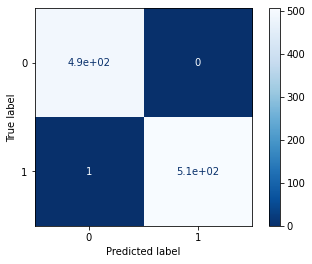

In [78]:
plot_confusion_matrix(svm, x_test, y_test,cmap='Blues_r')

In [79]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       493
           1       1.00      1.00      1.00       507

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



####KNN

In [80]:
knn_param = {'n_neighbors':[2,3,4,5],'leaf_size':[3,6,5,4]}
grid2 = GridSearchCV(KNeighborsClassifier(), knn_param)
grid2.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [3, 6, 5, 4],
                         'n_neighbors': [2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [81]:
grid2.best_params_

{'leaf_size': 3, 'n_neighbors': 2}

In [83]:
knn = grid2.best_estimator_
knn.fit(x_train,y_train.values.ravel())
knn_pred = knn.predict(x_test)

In [85]:
scores1=cross_val_score(knn,x_val,y_val.values.ravel(),cv=5,scoring = 'accuracy')
print(f"cv_scores of best KNN: {scores1}")
print(f"Mean: {scores1.mean()}")

cv_scores of best KNN: [0.98 0.99 0.99 1.   1.  ]
Mean: 0.992


In [86]:
print(f"Train Accuracy: {knn.score(x_train,y_train)}")
print(f"Testing Accuracy: {knn.score(x_test,y_test)}")

Train Accuracy: 0.998
Testing Accuracy: 0.999


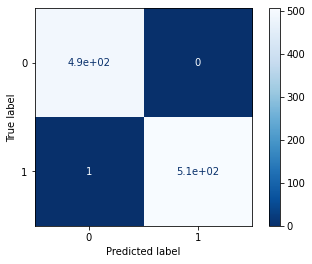

In [87]:
plot_confusion_matrix(knn, x_test, y_test,cmap='Blues_r')

In [88]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       493
           1       1.00      1.00      1.00       507

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



####MLP

In [111]:
mlp = MLPClassifier(random_state=1, max_iter=300).fit(x_train, y_train.values.ravel())

In [112]:
mlp_pred = mlp.predict(x_test)

In [113]:
scores2=cross_val_score(mlp,x_val,y_val.values.ravel(),cv=5,scoring = 'accuracy')
print(f"cv_scores of best MLP: {scores2}")
print(f"Mean: {scores2.mean()}")

cv_scores of best MLP: [1.   0.99 0.99 1.   1.  ]
Mean: 0.9960000000000001


In [129]:
print(f"Train Accuracy: {mlp.score(x_train,y_train)}")
print(f"Testing Accuracy: {mlp.score(x_test,y_test)}")

Train Accuracy: 0.997
Testing Accuracy: 0.999


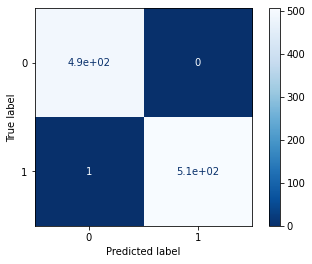

In [115]:
plot_confusion_matrix(mlp, x_test, y_test,cmap='Blues_r')

In [116]:
print(classification_report(y_test,mlp_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       493
           1       1.00      1.00      1.00       507

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



####CNN

In [89]:
x_ = X/255
print(Y_.shape)
print(X.shape)

(2000, 1)
(2000, 175, 175, 3)


In [90]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_, Y_, test_size=0.5)

In [91]:
l = [
          Conv2D(filters = 32, kernel_size = (3,3), input_shape = x_[0].shape, activation ='relu',use_bias = True),
          MaxPool2D(pool_size=(2,2)),
          Conv2D(filters = 64, kernel_size = (3,3)),
          MaxPool2D(pool_size=(2,2)),
          Flatten(),
          Dense(128, activation='relu'),
          Dropout(0.2),
          Dense(64, activation='relu'),
          Dense(32, activation='relu'),
          Dense(10, activation='softmax'),
          Dense(1, activation='relu')          
]
cnn = Sequential()
for i in l:
  cnn.add(i)

In [92]:
cnn.compile(loss='MeanSquaredError',
              optimizer='adam',
              metrics=['accuracy','mse'],
              steps_per_execution = 3)

e_stop = EarlyStopping(monitor='val_loss',patience=5)

In [94]:
cnn.fit(x_train1,y_train1,batch_size=128,epochs=25,
          validation_data=(L, P_),
          callbacks=[e_stop])

Epoch 1/25
8/8 [==============================] - 49s 6s/step - loss: 0.2628 - accuracy: 0.5080 - mse: 0.2628 - val_loss: 0.2544 - val_accuracy: 0.5000 - val_mse: 0.2544
Epoch 2/25
8/8 [==============================] - 49s 6s/step - loss: 0.2133 - accuracy: 0.5080 - mse: 0.2133 - val_loss: 0.1766 - val_accuracy: 0.5000 - val_mse: 0.1766
Epoch 3/25
8/8 [==============================] - 50s 6s/step - loss: 0.1772 - accuracy: 0.5080 - mse: 0.1772 - val_loss: 0.1752 - val_accuracy: 0.5000 - val_mse: 0.1752
Epoch 4/25
8/8 [==============================] - 46s 6s/step - loss: 0.1689 - accuracy: 0.5080 - mse: 0.1689 - val_loss: 0.1595 - val_accuracy: 0.5000 - val_mse: 0.1595
Epoch 5/25
8/8 [==============================] - 46s 6s/step - loss: 0.1543 - accuracy: 0.5080 - mse: 0.1543 - val_loss: 0.1481 - val_accuracy: 0.5000 - val_mse: 0.1481
Epoch 6/25
8/8 [==============================] - 47s 6s/step - loss: 0.1462 - accuracy: 0.8640 - mse: 0.1462 - val_loss: 0.1397 - val_accuracy: 0.994

In [98]:
loss = pd.DataFrame(cnn.history.history)

Text(0, 0.5, 'Accuracy')

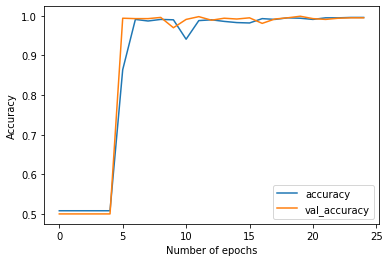

In [99]:
loss[['accuracy','val_accuracy']].plot()
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

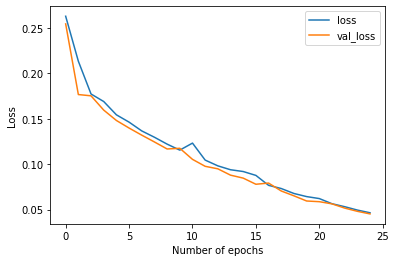

In [100]:
loss[['loss','val_loss']].plot()
plt.xlabel("Number of epochs")
plt.ylabel("Loss")

In [101]:
print(cnn.metrics_names)
print(cnn.evaluate(x_test1,y_test1,verbose=0))

['loss', 'accuracy', 'mse']
[0.04466038942337036, 0.996999979019165, 0.04466038942337036]


In [105]:
new_pred = np.argmax(cnn.predict(x_test1), axis=-1)

In [132]:
print(classification_report(new_pred,y_test1))

              precision    recall  f1-score   support

           0       1.00      0.49      0.66      1000
           1       0.00      0.00      0.00         0

    accuracy                           0.49      1000
   macro avg       0.50      0.25      0.33      1000
weighted avg       1.00      0.49      0.66      1000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


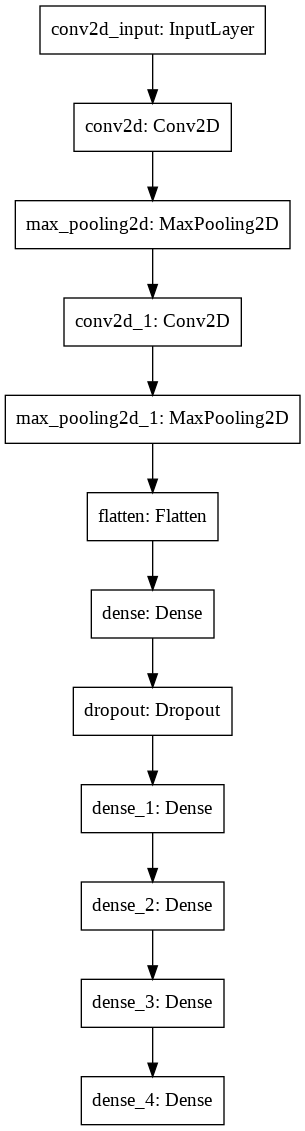

In [106]:
keras.utils.plot_model(cnn)

In [107]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 173, 173, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 86, 86, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 84, 84, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 112896)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               14450816  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

#Model Performance

<Figure size 432x288 with 0 Axes>

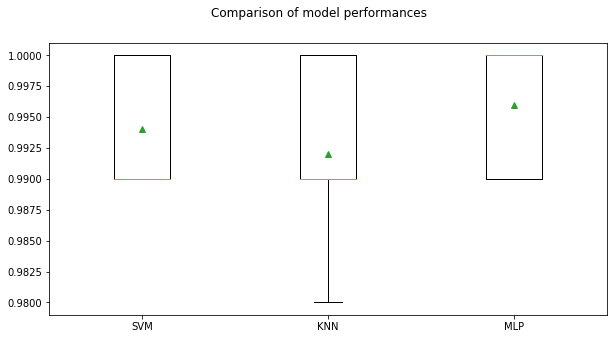

In [121]:
res = []
names = ['SVM','KNN','MLP']
res.append(scores)
res.append(scores1)
res.append(scores2)

fig = plt.figure()
fig = plt.figure(figsize=(10,5))
fig.suptitle("Comparison of model performances")
ax = fig.add_subplot(111)
plt.boxplot(res,showmeans=True)
ax.set_xticklabels(names)
plt.show()

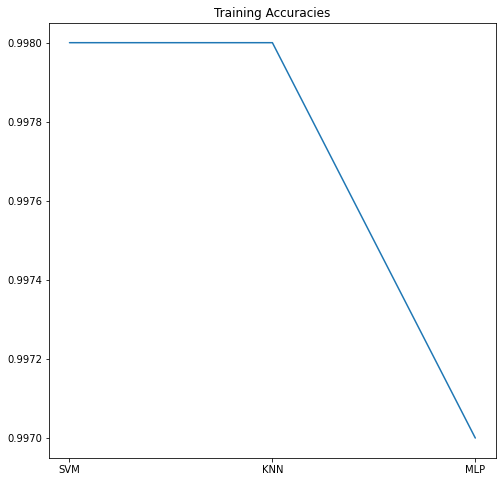

In [130]:
models = ['SVM', 'KNN', 'MLP']
acc = [0.998 , 0.998, 0.997 ]
plt.figure(figsize=(8,8))
plt.title('Training Accuracies')
sns.set_style('whitegrid')
sns.lineplot(x=models, y=acc)

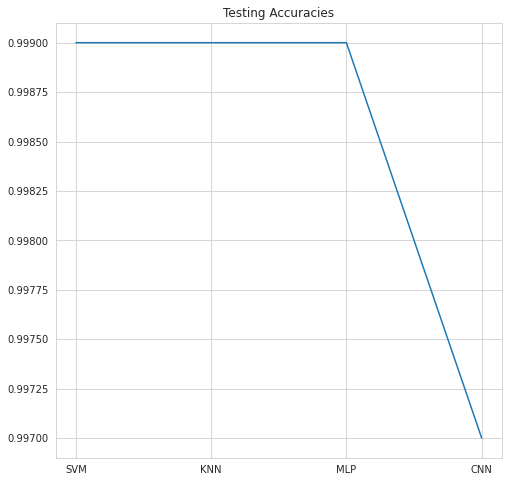

In [131]:
models1 = ['SVM', 'KNN', 'MLP', "CNN"]
acc1 = [0.999 , 0.999, 0.999, 0.996999979019165  ]
plt.figure(figsize=(8,8))
plt.title('Testing Accuracies')
sns.set_style('whitegrid')
sns.lineplot(x=models1, y=acc1)